# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!pip install scikit-image

In [9]:
#Import all the required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting graphs
import glob

from skimage import io
pd.set_option('display.max_colwidth',None) # Set the max column width to see the complete caption

import collections
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

import string, time, re
from sklearn.model_selection import train_test_split

import tensorflow

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from tqdm import tqdm
from PIL import Image

In [5]:
!pip install gTTs

In [6]:
!pip install playsound

In [7]:
from gtts import gTTS
from playsound import playsound
from IPython import display

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [10]:
print("Tensorflow Version:",tensorflow.__version__)
print("Keras Version     :",tensorflow.keras.__version__)

Tensorflow Version: 2.8.0
Keras Version     : 2.8.0


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [11]:
#Import the dataset and read the image into a seperate variable

#images='archive/Images/'
images='/content/drive/MyDrive/Eye_for_Blind/archive/Images/'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8121


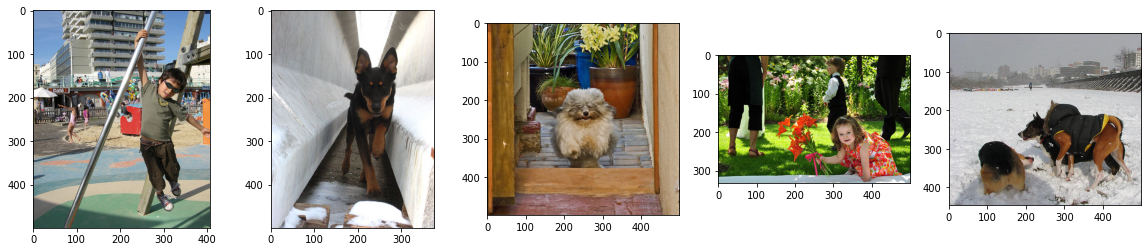

In [12]:
#Visualise both the images & text present in the dataset

#Visualising first 5 images:

Display_Images= all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
   
for ax,image in zip(axes, Display_Images):
    ax.imshow(io.imread(image), cmap=None)

In [13]:
#Import the dataset and read the text file into a seperate variable

#text_file = 'archive/captions.txt'
text_file = '/content/drive/MyDrive/Eye_for_Blind/archive/captions.txt'

def load_doc(text_file):
    
    #your code here
    open_file = open(text_file, 'r', encoding="latin-1") #associate and returns a file object
    text = open_file.read() #for reading the content of the file
    print(text)
    open_file.close()    
    return text

doc = load_doc(text_file)
print(doc[:300])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
all_imgs

['/content/drive/MyDrive/Eye_for_Blind/archive/Images/3759492488_592cd78ed1.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/379006645_b9a2886b51.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/380034515_4fbdfa6b26.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/3760400645_3ba51d27f9.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/377872672_d499aae449.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/380537190_11d6c0a412.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/380041023_0dfd712ef1.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/3759230208_1c2a492b12.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/384465575_31294122c0.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/386470686_1ae9242878.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/386656845_4e77c3e3da.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/390992102_67fa31b22f.jpg',
 '/content/drive/MyDrive/

In [15]:
#image_path='archive/Images/'
image_path='/content/drive/MyDrive/Eye_for_Blind/archive/Images/'

all_img_id=[]  #store all the image id here
all_img_vector=[] #store all the image path here
annotations= []#store all the captions here

with open('/content/drive/MyDrive/Eye_for_Blind/archive/captions.txt', 'r') as f:
#with open('archive/captions.txt', 'r') as f:
    next(f) # to skip the heading 
    for line in f:
        split_arr=line.split(',')
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n.')) #striping \n and fullstop
        all_img_vector.append(image_path+split_arr[0])
        
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                                                Path  \
0      /content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg   
1      /content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg   
2      /content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg   
3      /content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg   
4      /content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg   
...                                                                              ...   
40450   /content/drive/MyDrive/Eye_for_Blind/archive/Images/997722733_0cb5439472.jpg   
40451   /content/drive/MyDrive/Eye_for_Blind/archive/Images/997722733_0cb5439472.jpg   
40452   /content/drive/MyDrive/Eye_for_Blind/archive/Images/997722733_0cb5439472.jpg   
40453   /content/drive/MyDrive/Eye_for_Blind/archive/Images/997722733_0cb5439472.jpg   
40454   /content/drive/MyDrive/Eye_for_Blind/archive/Images/997722733_0cb5439472.jpg   

                                                                         Captions  
0         A child in a pink dress is climbing up a set of stairs in an entry way   
1                                            A girl going into a wooden building   
2                                 A little girl climbing into a wooden playhouse   
3                             A little girl climbing the stairs to her playhouse   
4                        A little girl in a pink dress going into a wooden cabin   
...                                                                           ...  
40450                                    A man in a pink shirt climbs a rock face  
40451                                     A man is rock climbing high in the air   
40452  A person in a red shirt climbing up a rock face covered in assist handles   
40453                                              A rock climber in a red shirt   
40454                           A rock climber practices on a rock climbing wall   

[40455 rows x 3 columns]

In [16]:
type(annotations)

list

In [17]:
len(annotations)

40455

In [18]:
len(all_img_id)

40455

In [19]:
len(all_img_id)/5

8091.0

In [20]:
#Create a list which contains all the captions
#annotations=#write your code here

#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images
#all_img_path=#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_id)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


**We can see that we had both A and a are counted separately. So,let's convert all words to lower case.**

In [21]:
#Create the vocabulary & the counter for the captions

vocabulary= [word.lower() for line in annotations for word in line.split()] #We can see that we had both

val_count=collections.Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

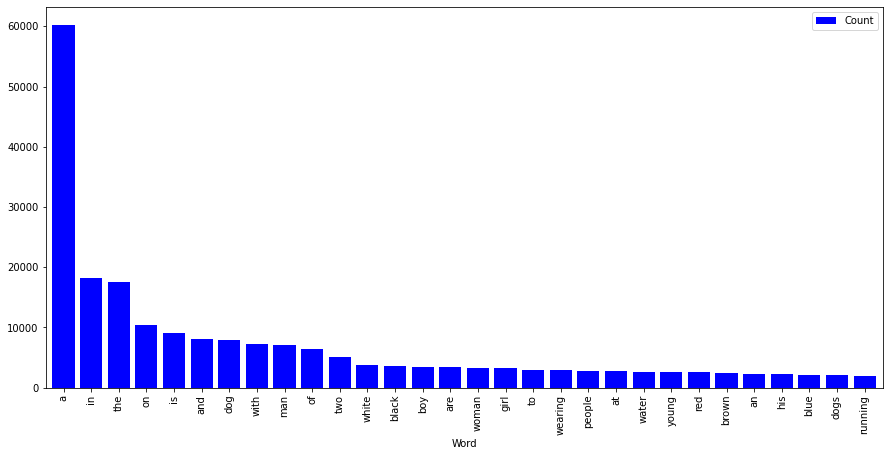

In [22]:
#Visualise the top 30 occuring words in the captions

top_30 = val_count.most_common(30)
top_30_df = pd.DataFrame(top_30, columns=['Word', 'Count'])
top_30_df.plot.bar(x='Word', y='Count', width=0.8, figsize=(15,7), color = 'blue')

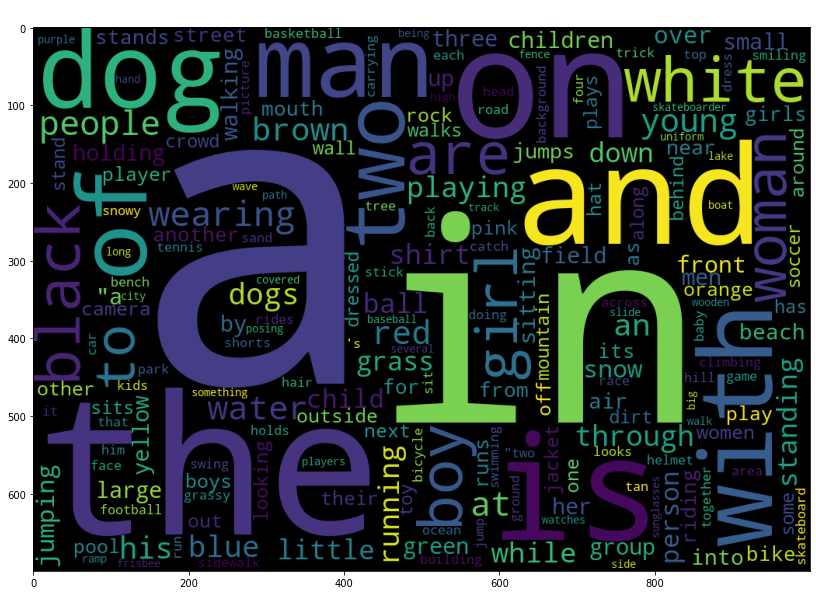

In [23]:
wordcloud = WordCloud(width =1000, height = 700).generate_from_frequencies(val_count)
plt.figure(figsize=(15,10))
plt.title("Most frequent words in the captions", fontsize=20,color='white')
plt.imshow(wordcloud)
plt.show()

We can see that stopwords are having higher frequency.Let's find top 30 commom words excluding them.

### Data Cleaning

- Converting all words to lower case
- Removing punctuations
- Retaining only words by removing numbers
- We are not removing stopwords but removing hanging s ,a or any one letter word.
- We are not performing stemming. 

In [24]:
# Data cleaning
# prepare translation table for removing punctuation
remove_punctuation = str.maketrans('', '', string.punctuation)
for i in range(len(annotations)):
    line = annotations[i]
    line = line.split()
    line = [word.lower() for word in line] # convert to lower case
    line = [word.translate(remove_punctuation) for word in line]# remove punctuation from each token
    line = [word for word in line if len(word)>1] # remove hanging 's' and 'a'
    line = [word for word in line if word.isalpha()]# remove tokens with numbers in them
    annotations[i]=  ' '.join(line)   # store as string

In [25]:
#Create a list which contains all the captions

#add the <start> & <end> token to all those captions as well
annotations=['<start>' + ' ' +  line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path= all_img_vector#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [26]:
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

### Create the tokenizer

- We have already removed numeric character in previous step. 
- Let's remove punctuations using filter again for to be sure(The default is all punctuation, plus tabs and line breaks, minus the ' character.)

- Convert words to lower case (this is also already done.Let's do again to be safe) 
- And,replace out-of-vocabulary words with UNK token and assign PAD token for reseved zero index

### Custom Tokenizer

In [27]:
PAD = 0   # Used for padding short sentences
SOS_token = 1   # Start-of-sentence token
EOS_token = 2   # End-of-sentence token

In [28]:
class Vocabulary:

    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD: "PAD", SOS_token: "<start>", EOS_token: "<stop>"}
        self.num_words = 0
        self.num_sentences = 0
        self.longest_sentence = 0

    def add_word(self, word):
        if word not in self.word2index:
            # First entry of word into vocabulary
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            # Word exists; increase word count
            self.word2count[word] += 1
            
    def add_sentence(self, sentence):
        sentence_len = 0
        for word in sentence.split(' '):
            sentence_len += 1
            self.add_word(word)
        if sentence_len > self.longest_sentence:
            # This is the longest sentence
            self.longest_sentence = sentence_len
        # Count the number of sentences
        self.num_sentences += 1

    def to_word(self, index):
        return self.index2word[index]

    def to_index(self, word):
        return self.word2index[word]

In [29]:
voc = Vocabulary('test')
voc

In [30]:
for annotation in annotations:
    voc.add_sentence(annotation)

In [31]:
for word in range(voc.num_words):
    print(voc.to_word(word))

Streaming output truncated to the last 5000 lines.
crime
seawall
churns
enviorment
repel
reclines
tw
rubs
taught
stoops
watermelon
watermelons
airplane
cones
dads
cone
flames
flaming
hulahoop
trainer
pinkcoated
fingers
smeared
sunsets
reflecting
diferent
sledding
oar
corgis
palace
looling
military
british
guardsman
winters
panda
shoveling
snowshovel
mini
shovel
shovels
apex
sheppard
bting
retrieved
flooded
japanese
schoolgirls
lining
purchase
tickets
theater
ticket
fences
passing
electricity
pylon
boxes
ourdoors
musician
perfoms
statues
easter
sculptures
structures
phones
focused
cellphones
banks
mounds
snowbanks
landscaped
brooms
sweeping
caravan
buggys
wiht
backview
wheelchair
scratches
observes
scratching
sandbox
pillows
furniture
squabble
twenties
liquid
mug
distored
oxford
magazine
wintery
sitts
melted
wizards
basket
fill
packed
climing
hop
tussle
louis
vuitton
widow
shops
leafless
dove
abseiling
repelling
cord
rappelling
cliffside
extreme
repels
individual
dangles
technical
suppo

In [32]:
voc.to_index('<start>')

0

In [33]:
anno_tkns = []
anno_idxs = []

for sent in annotations:
    sent_tkns = []
    sent_idxs = []
    for word in sent.split(' '):
        sent_tkns.append(word)
        sent_idxs.append(voc.to_index(word))
    anno_tkns.append(sent_tkns)
    anno_idxs.append(sent_idxs)

In [34]:
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [35]:
anno_idxs[0:5]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 11, 12, 13, 14],
 [0, 15, 16, 17, 18, 19, 14],
 [0, 20, 15, 6, 17, 18, 21, 14],
 [0, 20, 15, 6, 22, 10, 23, 24, 21, 14],
 [0, 20, 15, 2, 3, 4, 16, 17, 18, 25, 14]]

In [36]:
coded_captions = anno_idxs
print(len(coded_captions))

40455


In [37]:
token_wordcount = voc.word2count
token_wordcount = list(token_wordcount.items())

In [38]:
token_wordcount[0:10]

[('<start>', 40455),
 ('child', 1517),
 ('in', 18182),
 ('pink', 702),
 ('dress', 332),
 ('is', 9069),
 ('climbing', 490),
 ('up', 1215),
 ('set', 105),
 ('of', 6496)]

In [39]:
tokenised_token = [list_item[:][0] for list_item in token_wordcount]
tokenised_token_count = [list_item[:][1] for list_item in token_wordcount]

tokenized_df = pd.DataFrame({'Tokens':tokenised_token, 'Count':tokenised_token_count})
tokenized_df.head(10)

Tokens  Count
0   <start>  40455
1     child   1517
2        in  18182
3      pink    702
4     dress    332
5        is   9069
6  climbing    490
7        up   1215
8       set    105
9        of   6496

In [40]:
GroupByTokens = tokenized_df.sort_values(by='Count', ascending=False)
GroupByTokens = GroupByTokens.reset_index()
GroupByTokens = GroupByTokens.drop(['index'], axis=1)
GroupByTokens = GroupByTokens.head(30)
GroupByTokens

Tokens  Count
0   <start>  40455
1     <end>  40455
2        in  18182
3       the  17676
4        on  10367
5        is   9069
6       and   8057
7       dog   7956
8      with   7308
9       man   7164
10       of   6496
11      two   5546
12    white   3710
13    black   3627
14      boy   3534
15      are   3365
16    woman   3320
17     girl   3284
18       to   3005
19  wearing   2917
20   people   2837
21       at   2819
22    water   2676
23    young   2610
24      red   2553
25    brown   2471
26       an   2358
27      his   2255
28     blue   2125
29     dogs   2097

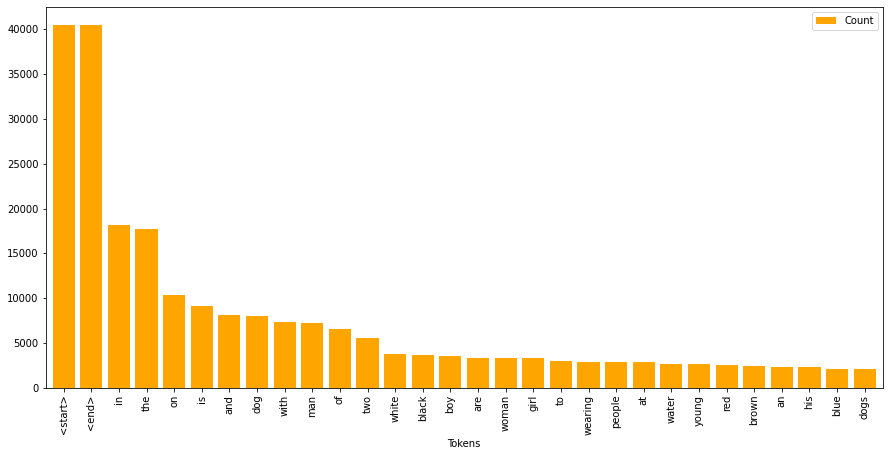

In [41]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

GroupByTokens.plot.bar(x='Tokens', y='Count', width=0.8, figsize=(15,7), color = 'orange')

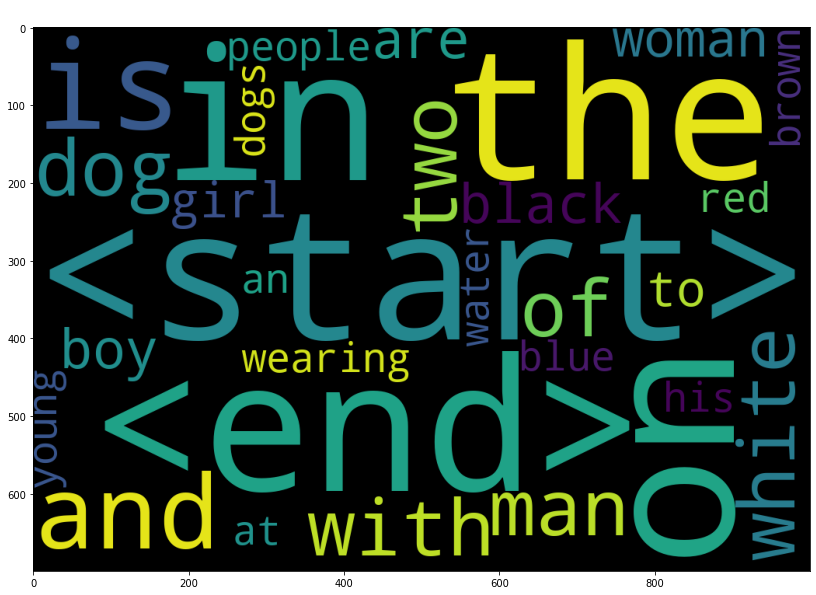

In [42]:
token_valcount=Counter(GroupByTokens['Tokens'])

wordcloud = WordCloud(width =1000, height = 700).generate_from_frequencies(token_valcount)
plt.figure(figsize=(15,10))
plt.title("Most frequent words after tokenization", fontsize=20,color='white')
plt.imshow(wordcloud)
plt.show()

In [43]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
voc.longest_sentence

31

In [44]:
caption_vec= tf.keras.preprocessing.sequence.pad_sequences(coded_captions, maxlen=voc.longest_sentence, dtype='int32', padding='post', value=0)

print("The shape of Caption vector is :" + str(caption_vec.shape))

The shape of Caption vector is :(40455, 31)


In [45]:
caption_vec[0:5]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  2, 11, 12, 13, 14,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15, 16, 17, 18, 19, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20, 15,  6, 17, 18, 21, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20, 15,  6, 22, 10, 23, 24, 21, 14,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20, 15,  2,  3,  4, 16, 17, 18, 25, 14,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

In [46]:
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

### Keras Tokenizer

In [47]:

top_voc = 5000
tokenizer =Tokenizer(num_words=top_voc+1,filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
                                                  lower=True, char_level=False,
                                                  oov_token="UNK")


# Create word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations) #Updates internal vocabulary based on a list of texts.

train_seqs = tokenizer.texts_to_sequences(annotations)#Transforms each text in texts to a sequence of integers.

# when we use the pad_sequence to process the sequence, we will be using 0 as the padding value.
# In order to distinguish between PAD and UNKNOWN, keras use different index for UNKNOWN.

# 0 is a reserved index that won't be assigned to any word.Let's add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'


In [48]:
print(tokenizer.oov_token)
tokenizer.index_word

UNK


{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [49]:
tokenizer.index_word


{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [50]:
token_wordcount = tokenizer.word_counts
token_wordcount

OrderedDict([('<start>', 40455),
             ('child', 1517),
             ('in', 18182),
             ('pink', 702),
             ('dress', 332),
             ('is', 9069),
             ('climbing', 490),
             ('up', 1215),
             ('set', 105),
             ('of', 6496),
             ('stairs', 109),
             ('an', 2358),
             ('entry', 1),
             ('way', 48),
             ('<end>', 40455),
             ('girl', 3284),
             ('going', 145),
             ('into', 1046),
             ('wooden', 278),
             ('building', 485),
             ('little', 1750),
             ('playhouse', 6),
             ('the', 17676),
             ('to', 3005),
             ('her', 1102),
             ('cabin', 4),
             ('black', 3627),
             ('dog', 7956),
             ('and', 8057),
             ('spotted', 36),
             ('are', 3365),
             ('fighting', 130),
             ('tricolored', 12),
             ('playing', 1954),
        

In [51]:
annotations[:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [52]:
train_seqs[:5]

[[2, 43, 4, 88, 169, 7, 115, 52, 390, 12, 382, 4, 28, 1, 687, 3],
 [2, 19, 309, 63, 193, 119, 3],
 [2, 37, 19, 115, 63, 193, 2354, 3],
 [2, 37, 19, 115, 5, 382, 20, 62, 2354, 3],
 [2, 37, 19, 4, 88, 169, 309, 63, 193, 2889, 3]]

In [53]:
print(len(train_seqs))
print(type(train_seqs))

40455
<class 'list'>


In [54]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

train_seqs_len=[len(seq) for seq in train_seqs] #storing all lengths in list.Can be used if needed in future
longest_word_length= max(train_seqs_len) #Python list method max returns the elements from the list with maximum value.

# Calculates the longest_word_length to pad all sequences to be the same length as the longest one.

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))


The shape of Caption vector is :(40455, 31)


We are padding zero at last using padding='post'. We know that start token acts as prompter and it expect some word after tat.
Zero indicates no word and have no value at beginning.So,in order to not disturb the
existing sequence structure we pad at end. This padding will cause problem while creating embedding vector.So we will be applying mask then.

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [55]:
#checking to know about image format as we will be setting data format as none in tf.keras.applications.inception_v3.preprocess_input

tf.keras.backend.image_data_format() 

'channels_last'

Image data format have default as 'channels_last' which indicates Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

In [56]:
# write your code here for creating the function. This function should return images & their path
def get_processed_image(img_path):
    im = tf.io.read_file(img_path)
    im = tf.image.decode_jpeg(im,channels=3)
    im = tf.image.central_crop(im, 0.95)
    im = tf.image.resize(im, (299, 299))
    im = tf.keras.applications.inception_v3.preprocess_input(im)
    return im, img_path

Image before processed


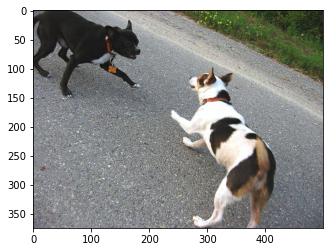

In [57]:
print("Image before processed")
plt.imshow(tf.image.decode_jpeg(tf.io.read_file(all_img_vector[5]),channels=3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image shape after preprocessing : (299, 299, 3)


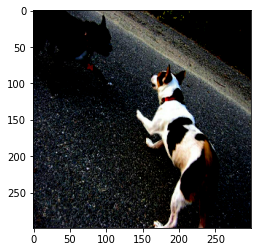

In [58]:
print("Image shape after preprocessing :", get_processed_image(all_img_vector[5])[0].shape)
plt.imshow(get_processed_image(all_img_vector[5])[0])

In [59]:
all_img_vector[0:10]

['/content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1000268201_693b08cb0e.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1001773457_577c3a7d70.jpg',
 '/content/drive/MyDrive/Eye_for_Blind/archive/Images/1001773457_577c3a7d70.jpg']

In [60]:
#write your code here to create the dataset consisting of image paths
sorted_img_vector = sorted(set(all_img_vector))

In [61]:
#write your code here
# mapping each image full path including name to the function to preprocess the image

AUTOTUNE = tf.data.experimental.AUTOTUNE

New_Image_Data = tf.data.Dataset.from_tensor_slices(sorted_img_vector)

New_Image_Data = New_Image_Data.map(get_processed_image, num_parallel_calls=AUTOTUNE)

New_Image_Data= New_Image_Data.batch(64,drop_remainder=False)

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [62]:
New_Image_Data

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [63]:
#write your code here

# performing the train-test spliit using 80-20 ratio & random state = 42

img_train_data, img_test_data, caption_train_data, caption_test_data = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

In [64]:
print("Training data for images: " + str(len(img_train_data)))
print("Testing data for images: " + str(len(img_test_data)))
print("Training data for Captions: " + str(len(caption_train_data)))
print("Testing data for Captions: " + str(len(caption_test_data)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [65]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

image_features_extract_model = tensorflow.compat.v1.keras.Model(new_input, hidden_layer)  #build the final model using both input & output layer


In [66]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

We are not classifying the images here. Rather,we only need to extract an image vector for our images.Hence we are removing the softmax layer from the model.

In [67]:
# write your code to extract features from each image in the dataset
image_features_dict={}
for image, image_path in tqdm(New_Image_Data): #using tqdm as progress bar
    
    features_for_batch = image_features_extract_model(image) #sending images from dataset to Inception v3

    features_for_batch_flattened = tf.reshape(features_for_batch,
                                              (features_for_batch.shape[0], -1, features_for_batch.shape[3])) ##We are sqeezing/squashing 
                                   
    for batch_feat, path in zip(features_for_batch_flattened, image_path):
        feature_path = path.numpy().decode("utf-8")
        image_features_dict[feature_path] =  batch_feat.numpy()
        
print(features_for_batch.shape)

100%|██████████| 127/127 [01:19<00:00,  1.59it/s]

(27, 8, 8, 2048)


In [68]:
features_for_batch

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 4.36548144e-01, 3.92271459e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.19291314e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.13560699e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 3.23687196e-01, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [69]:
features_for_batch_flattened

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.        , 0.43654814, 0.39227146, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.21929131],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         1.5245765 , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.5128131 , 0.        ],
        [0.6949915 , 1.7728174 , 0.        , ..., 0.        ,
         0.01960793, 0.        ]],

       [[0.        , 0.        , 0.        , ..., 1.056348  ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.6676238 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.3285391 ,
         0.        , 0.        ],
        ...,
        [0.        , 0.0501499 , 0.43143573, ..., 0.

In [70]:
print(len(image_features_dict))
print(batch_feat.shape)

8091
(64, 2048)


In [71]:
#we need to give both images and caption to model as input
def model_input(image,captions):
    image_final = image_features_dict[image.decode('utf-8')]
    return image_final,captions

In [72]:
# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Batch size
BATCH_SIZE = 64 

def data_generator(images_data, captions_data):
    
    # Creating a Dataset using tf.data.Dataset.from_tensor_slice 
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data)) 

    # num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(model_input, [item1, item2], [tf.float32, tf.int32]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # reshuffle_each_iteration=True indicate Shuffle order should be different for each epoch.
    # Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
    # We don't want to drop the last batch if it contains element less than 64.So let's set drop_remainder=False 
    # Prefetch function is used to prepare later elements while the current element is being processed.
    
    dataset = dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [73]:
train_dataset=data_generator(img_train_data,caption_train_data) 
test_dataset=data_generator(img_test_data,caption_test_data) 

In [74]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(64, 64, 2048)
(64, 31)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [75]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(img_train_data) // BATCH_SIZE  #len(total train images) // BATCH_SIZE
test_num_steps = len(img_test_data) // BATCH_SIZE   #len(total test images) // BATCH_SIZE
max_length=31
features_shape = batch_feat.shape[1]
attention_features_shape = batch_feat.shape[0]

### Encoder

In [76]:
tf.compat.v1.reset_default_graph() #to resolve compatibility issue
#from tensorflow.python.framework import ops
#ops.reset_default_graph()
#tf.compat.v1.GraphDef()

In [77]:
print(tf.compat.v1.get_default_graph())


In [78]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        #It acts as the fully connected layer
        
    def call(self, features):
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0) #applying relu activation 
        return features

In [79]:
encoder=Encoder(embedding_dim)

### Attention model

In [80]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 =  tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis=hidden[:, tf.newaxis] # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score =tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)
        # the tensor is reduced along the second dimension (columns)

        return context_vector, attention_weights

### Decoder

In [81]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)   #build your Dense layer

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed = self.embed(x)# embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [82]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [83]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)
print('hidden layer shape from Decoder: {}'.format(hidden_out.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)
hidden layer shape from Decoder: (64, 512)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [84]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #define the optimizer

# class SparseCategoricalCrossentropy will be used as
#  1. targets are integers
#  2.  saves time in memory as well as computation time
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction=tf.keras.losses.Reduction.NONE,
                                                            name='sparse_categorical_crossentropy') #define your loss object

In [85]:
# zero is causing discrepency.we dont want decoder to give importance to zero.so lets mask zero to false

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask # we are multiplying loss with mask to get ideal shape

    return tf.reduce_mean(loss_)

In [86]:
checkpoint_path = "archives/Chekpoints"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [87]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [88]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation for implementing backpropagation
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder
        for t in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden) # passing encoder_output to the decoder

            loss += loss_function(target[:, t], predictions)

            dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1])) #we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables
    
    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables)) 
        
    return loss, avg_loss

In [89]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation.
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder.
        for t in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden) # passing encoder_output to the decoder

            loss += loss_function(target[:, t], predictions) 

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1]))#we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables

    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables))
        
    return loss, avg_loss

In [90]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data

    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss / test_num_steps
    
    return avg_test_loss

In [91]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.438, & test loss is 1.203
Time taken for 1 epoch 169.09024262428284 sec

Test loss has been reduced from 100.000 to 1.203


  7%|▋         | 1/15 [02:49<39:31, 169.42s/it]

For epoch: 2, the train loss is 1.111, & test loss is 1.058
Time taken for 1 epoch 69.72117233276367 sec

Test loss has been reduced from 1.203 to 1.058


 13%|█▎        | 2/15 [03:59<24:01, 110.91s/it]

For epoch: 3, the train loss is 1.007, & test loss is 0.975
Time taken for 1 epoch 69.46036553382874 sec

Test loss has been reduced from 1.058 to 0.975


 20%|██        | 3/15 [05:09<18:25, 92.10s/it] 

For epoch: 4, the train loss is 0.934, & test loss is 0.908
Time taken for 1 epoch 69.68009686470032 sec

Test loss has been reduced from 0.975 to 0.908


 27%|██▋       | 4/15 [06:19<15:16, 83.34s/it]

For epoch: 5, the train loss is 0.873, & test loss is 0.851
Time taken for 1 epoch 69.68961191177368 sec

Test loss has been reduced from 0.908 to 0.851


 40%|████      | 6/15 [08:38<11:19, 75.52s/it]

For epoch: 6, the train loss is 0.820, & test loss is 0.800
Time taken for 1 epoch 69.541006565094 sec

Test loss has been reduced from 0.851 to 0.800
For epoch: 7, the train loss is 0.772, & test loss is 0.752
Time taken for 1 epoch 69.61414313316345 sec

Test loss has been reduced from 0.800 to 0.752


 47%|████▋     | 7/15 [09:48<09:49, 73.67s/it]

For epoch: 8, the train loss is 0.727, & test loss is 0.710
Time taken for 1 epoch 69.4314284324646 sec

Test loss has been reduced from 0.752 to 0.710


 53%|█████▎    | 8/15 [10:58<08:26, 72.39s/it]

For epoch: 9, the train loss is 0.686, & test loss is 0.668
Time taken for 1 epoch 69.67630863189697 sec

Test loss has been reduced from 0.710 to 0.668


 60%|██████    | 9/15 [12:08<07:09, 71.61s/it]

For epoch: 10, the train loss is 0.649, & test loss is 0.630
Time taken for 1 epoch 69.53595232963562 sec

Test loss has been reduced from 0.668 to 0.630


 73%|███████▎  | 11/15 [14:27<04:42, 70.68s/it]

For epoch: 11, the train loss is 0.613, & test loss is 0.595
Time taken for 1 epoch 69.67518186569214 sec

Test loss has been reduced from 0.630 to 0.595
For epoch: 12, the train loss is 0.582, & test loss is 0.560
Time taken for 1 epoch 69.59371161460876 sec

Test loss has been reduced from 0.595 to 0.560


 80%|████████  | 12/15 [15:37<03:31, 70.42s/it]

For epoch: 13, the train loss is 0.552, & test loss is 0.534
Time taken for 1 epoch 69.54130935668945 sec

Test loss has been reduced from 0.560 to 0.534


 87%|████████▋ | 13/15 [16:47<02:20, 70.22s/it]

For epoch: 14, the train loss is 0.525, & test loss is 0.506
Time taken for 1 epoch 69.47916674613953 sec

Test loss has been reduced from 0.534 to 0.506


 93%|█████████▎| 14/15 [17:56<01:10, 70.06s/it]

For epoch: 15, the train loss is 0.498, & test loss is 0.480
Time taken for 1 epoch 69.6199722290039 sec

Test loss has been reduced from 0.506 to 0.480


100%|██████████| 15/15 [19:06<00:00, 76.45s/it]


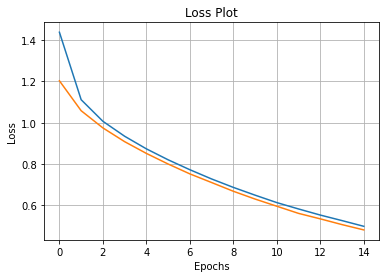

In [92]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.grid('off')
plt.show()


## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [93]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    #hidden = decoder.reset_state(batch_size=1)
    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(get_processed_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id =  tf.argmax(predictions[0]).numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])#map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [94]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [95]:
from nltk.translate.bleu_score import sentence_bleu

In [96]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [97]:
img_test=img_test_data.copy()

In [98]:
#modifying the given code as function to run it several times by changing weights
def predicted_caption_audio(random,autoplay=False,weights=(0.5, 0.5, 0, 0)):

    cap_test=caption_test_data.copy()
    rid = np.random.randint(0, random)
    test_image = img_test[rid]
    #test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)

    real_caption=filt_text(real_caption)      

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights)
    print(f"BELU score: {score*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False) 
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=False))
    
    return test_image

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 35.35533905932738
Real Caption: large wild cat is pursuing horse across meadow
Prediction Caption: the lioness is running in field of field


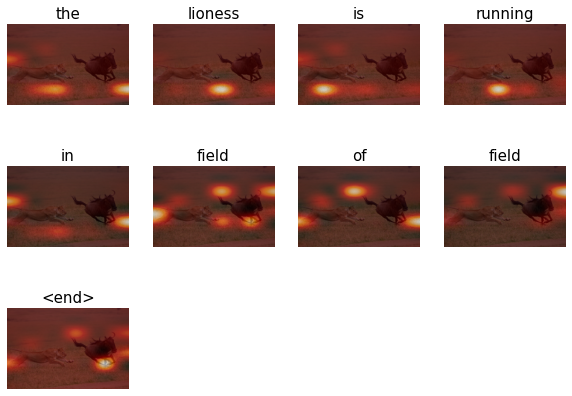

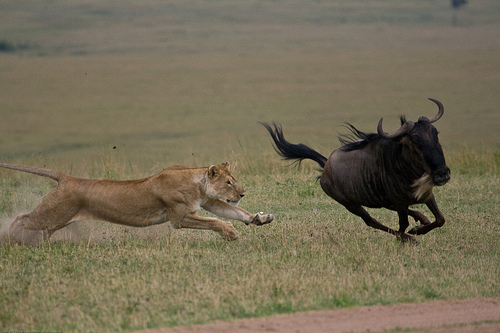

In [99]:
test_image=predicted_caption_audio(5,True,weights=(0.5,0.25,0,0))

Image.open(test_image)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 47.14045207910317
Real Caption: large woman dances
Prediction Caption: woman in red halter dances as she dances outdoors


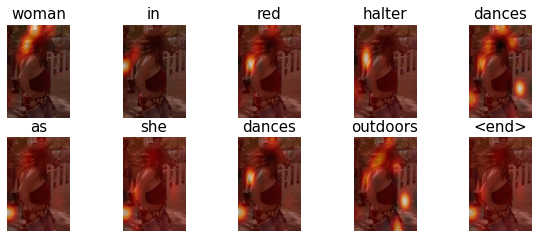

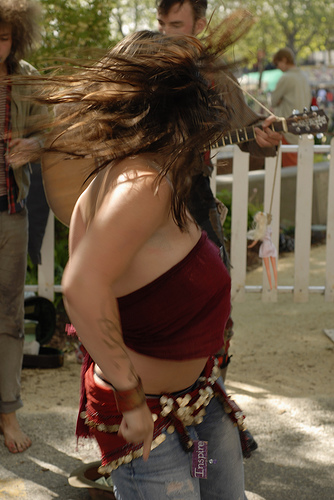

In [100]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.25,0,0))

Image.open(test_image)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 44.827003201768264
Real Caption: baby laughs at his reflection in mirror
Prediction Caption: child in burgundy hoodie smiling


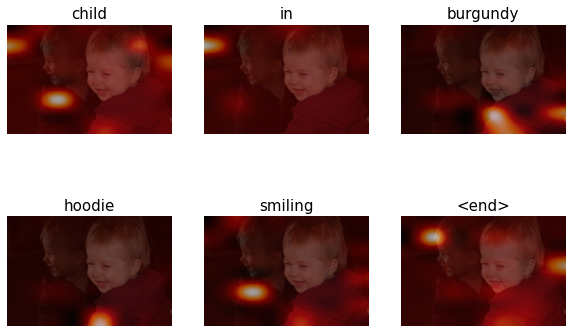

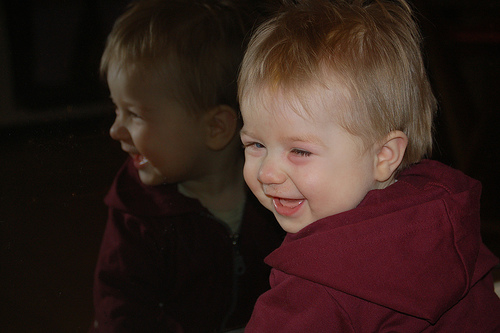

In [101]:
test_image1=predicted_caption_audio(len(img_test),False,weights=(0.25,0.25,0,0))

Image.open(test_image1)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 22.416933501922294
Real Caption: girl and guy dressed up in costumes
Prediction Caption: two individuals dressed up like animals are dressed up on the camera


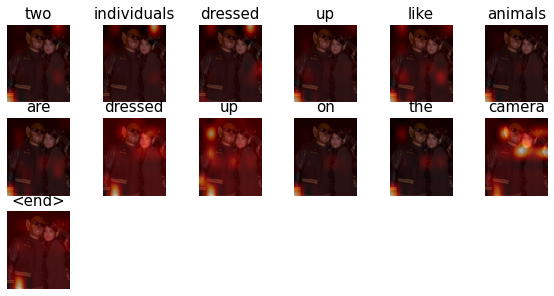

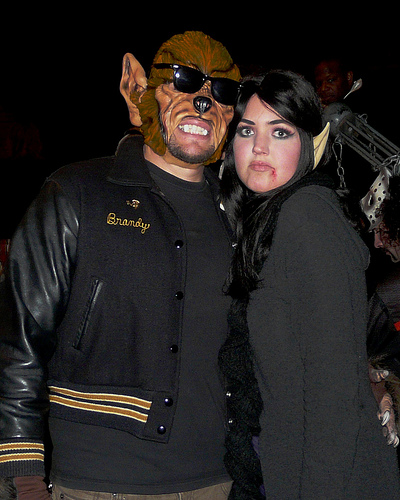

In [102]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.25,0,0))

Image.open(test_image)

BELU score: 56.47181220077593
Real Caption: group of people are standing together outside as one takes photograph
Prediction Caption: group of people are standing together outside


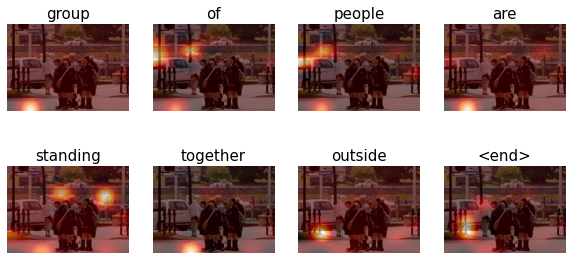

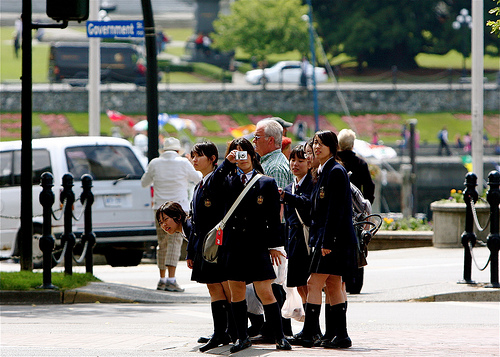

In [103]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.25,0,0))

Image.open(test_image)


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BELU score: 17.97887351536103
Real Caption: the boy is looking up at the girl as another girl UNK them
Prediction Caption: two people looking at each other


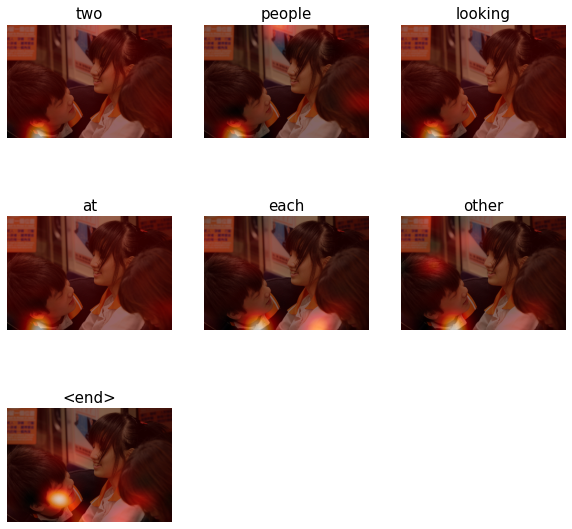

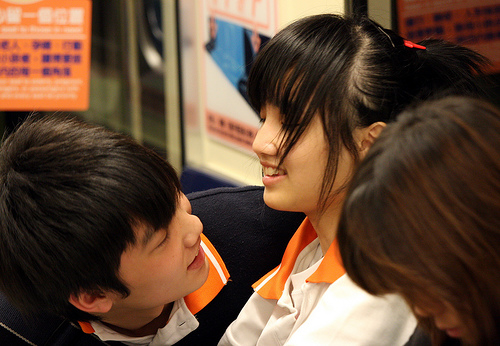

In [106]:
test_image=predicted_caption_audio(len(img_test),True,weights=(0.5,0.25,0,0))

Image.open(test_image)

-----------------------------------------------------------------------------------------------------------------------